In [29]:
%pylab inline
import rlcompleter, readline
readline.parse_and_bind('tab: complete')
from sets import Set

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [56]:
alexnet_train = np.load("CS5785-final-data/alexnet_feat_train.npy")
sift_train = np.load("CS5785-final-data/SIFTBoW_train.npy")
train = np.genfromtxt("CS5785-final-data/train.txt",dtype='str')
train_label = list(train[:,1])

In [57]:
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding 
lle = LocallyLinearEmbedding(n_components=2)
isomap = Isomap(n_components = 2)
alexnet_manifold = isomap.fit_transform(alexnet_train)
#alexnet_manifold = lle.fit_transform(alexnet_train)

In [43]:
def assign_class(train):
    classes = []
    for each in Set(train_label):
        classes.append(np.asarray([alexnet_manifold[i] for i in range(len(train_label)) if train_label[i] == each]))
    return np.asarray(classes)
classes = assign_class(alexnet_train)

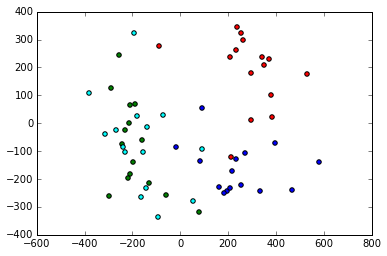

In [51]:
plt.scatter(classes[0,:,0],classes[0,:,1],c='r')
plt.scatter(classes[2,:,0],classes[2,:,1],c='g')
plt.scatter(classes[3,:,0],classes[3,:,1],c='b')
plt.scatter(classes[4,:,0],classes[4,:,1],c='cyan')

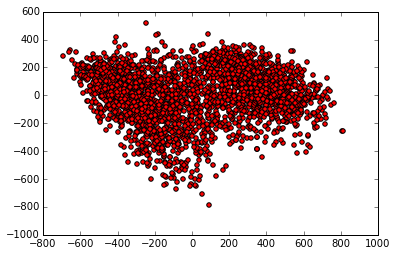

In [45]:
plt.scatter(alexnet_manifold[:,0],alexnet_manifold[:,1],c='r')

In [58]:
from sklearn.svm import SVC
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30,algorithm='kd_tree')

In [59]:
def crossvalidation(clf,train,train_label,k):
    scores = cross_validation.cross_val_score(clf,train,train_label, cv=k)
    return average(scores)

In [60]:
crossvalidation(svm,alexnet_train,train_label,3)

0.19966666666666666

In [61]:
crossvalidation(knn,alexnet_train,train_label,3)

0.26200000000000001

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
scale_alexnet = scale(alexnet_train, axis=0, with_mean=True, with_std=True, copy=True)
normal_alexnet = normalize(scale_alexnet, norm='l2', axis=1, copy=True)
clf = GaussianNB()
#print alexnet_train
#clf.fit(alexnet_train,train_label)
crossvalidation(clf,normal_alexnet,train_label,3)

0.38400000000000006

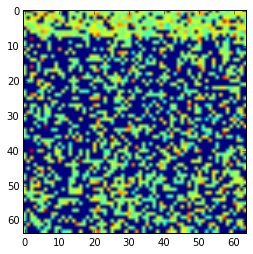

In [72]:
plt.imshow(sift_train[1000].reshape(64,64))

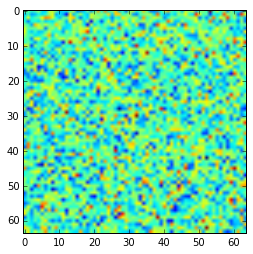

In [73]:
plt.imshow(alexnet_train[1000].reshape(64,64))

In [78]:
from sklearn.ensemble import BaggingClassifier
svn = SVC(kernel='rbf',C=10,gamma=0.0001)
bag = BaggingClassifier(base_estimator=clf, n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, n_jobs=1, random_state=None, verbose=0)
score = cross_validation.cross_val_score(bag,scale_alexnet,train_label,cv=3)

In [79]:
print score

[ 0.348  0.349  0.367]


In [ ]:
from sklearn.ensemble import BaggingClassifier
#svn = SVC(kernel='rbf',C=10,gamma=0.0001)
gnb = GaussianNB()
bag = BaggingClassifier(base_estimator=gnb, n_estimators=100, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, n_jobs=1, random_state=None, verbose=0)
score = cross_validation.cross_val_score(bag,scale_alexnet,train_label,cv=3)

In [80]:
print score

[ 0.348  0.349  0.367]
